In [1]:
from pathlib import Path
import os
import platform
from models.UCRDataset import UCRDataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from TSEvo.EvoUtils import frequency_band_mapping,authentic_opposing_information, mutate_mean
from deap import creator, base, algorithms, tools
from deap.benchmarks.tools import hypervolume, diversity, convergence
from tslearn.datasets import UCR_UEA_datasets
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin,window=0)

os_type= platform.system()

dataset ='ElectricDevices' #'ArrowHead'
X_train,train_y,X_test,test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])

mi =  -1  #np.min(X_train)
ma= np.max(X_train) 
test_dataset = UCRDataset(test_x,test_y)
linewidth=3

original_x, y = test_dataset[0]
#print(y)
if len(original_x.shape) <3:
    original_x=np.array([original_x])
reference_set = test_x[np.where(test_y!=y)] 
print(reference_set.shape)
    

(6968, 1, 96)


In [2]:
'''Make Original to Individual'''
creator.create("Individual", list, fitness=creator.FitnessMin,window=10,channels=[1],mutation=None)
#ind1=creator.Individual(np.array(observation_01).tolist())
org_ind=creator.Individual(original_x.reshape(-1).tolist())
org_ind.window=10
org_ind.channels=[1]

/home/jacqueline/.local/share/virtualenvs/TSEvo-ydCVe3on/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


(1, 96)


/home/jacqueline/.local/share/virtualenvs/TSEvo-ydCVe3on/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  


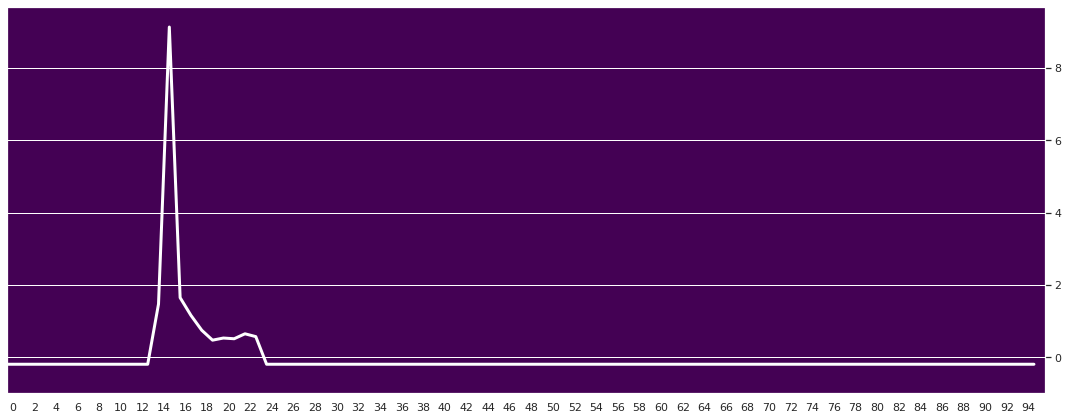

In [3]:
'''Plot Original'''
sns.set(rc={'figure.figsize':(15,6)})
original=original_x[0]
l=original.shape[-1]
print(original.shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= np.zeros_like(original.reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=original.flatten(),  color='white',linewidth=linewidth)
#plt.show()
plt.ylim(mi, ma)
plt.tight_layout()
plt.savefig('./Paper_Images/Original.svg', format='svg', transperent=True)

plt.show()





(96,)
(1, 96)
(1, 96)


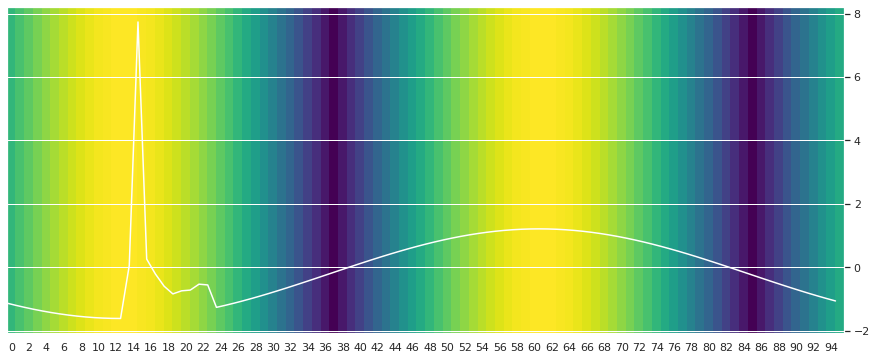

In [4]:
'''frequency_band_mapping'''
print(np.array(org_ind).shape)
org_ind.channels=np.array([1])
ind1 , = frequency_band_mapping(org_ind, reference_set)
sns.set(rc={'figure.figsize':(15,6)})
original=original_x[0]
l=original.shape[-1]
print(original.shape)
print(np.array(ind1).shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= np.abs(original.reshape(-1)-np.array(ind1).reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=np.array(ind1).flatten(), color='white')
plt.show()
plt.close()

(array([0]),)
(1, 96)


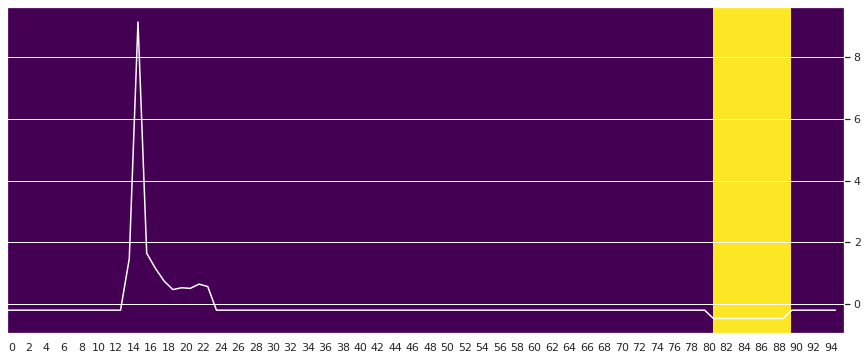

In [5]:
'''authentic opposing information'''
org_ind.channels=np.array([1])
print(np.where(org_ind.channels==1))
ind2 , = authentic_opposing_information(org_ind, reference_set)
'''Plot Original'''
sns.set(rc={'figure.figsize':(15,6)})
original=original_x[0]
l=original.shape[-1]
print(original.shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= (original.reshape(-1)-np.array(ind2).reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=np.array(ind2).flatten(), color='white')
plt.show()
plt.close()


(1, 96)
(96,)


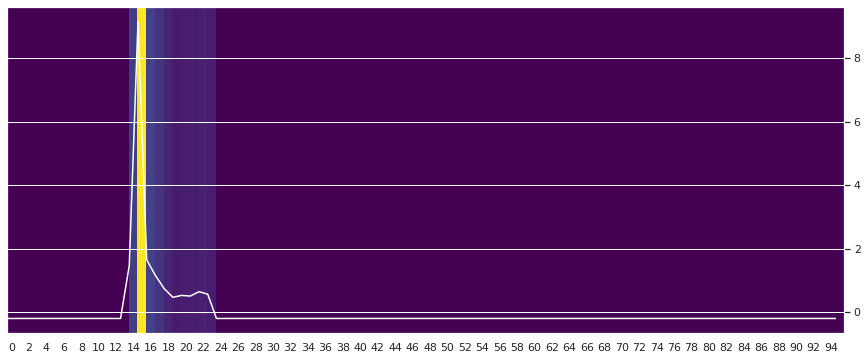

In [6]:
'''Mutate Mean'''
#TODO 
org_ind.channels=[1]
ind1 , = mutate_mean(org_ind, reference_set)
sns.set(rc={'figure.figsize':(15,6)})
#riginal=original_x[0]
l=original.shape[-1]
print(original.shape)
print(np.array(ind1).shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= np.abs(original.reshape(-1)-np.array(ind1)[0].reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=np.array(ind1).flatten(), color='white')
plt.show()
plt.close()

In [7]:
from TSEvo.EvoUtils import recombine
window_size=10
original_x_1=test_x[1]
ind1 = creator.Individual(np.array(original_x).reshape(1,-1).tolist())
ind2= creator.Individual(np.array(original_x_1).reshape(1,-1).tolist())
ind1.window=window_size
ind2.window=window_size
ind1.channels=[1]
ind2.channels=[1]
ind1.mutation=''
ind2.mutation=''

ind1_x, ind2_x=recombine(ind1,ind2)

(1, 96)


/home/jacqueline/.local/share/virtualenvs/TSEvo-ydCVe3on/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  del sys.path[0]


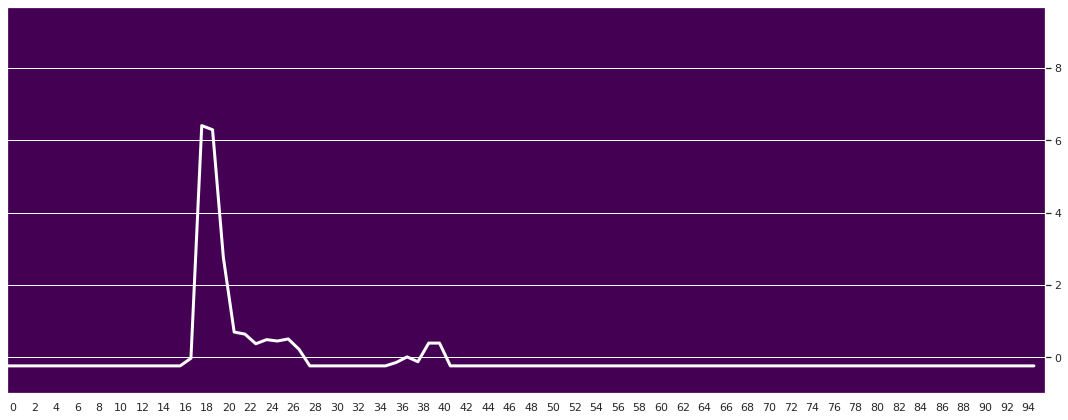

In [8]:
'''Plot Original Ind 2'''
sns.set(rc={'figure.figsize':(15,6)})
original=test_x[1]
l=original.shape[-1]
print(original.shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= np.zeros_like(original.reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=original.flatten(), color='white', linewidth=linewidth)
plt.ylim(mi, ma)
plt.tight_layout()
plt.savefig('./Paper_Images/Ind2.svg', format='svg', transperent=True)
plt.show()
plt.close()


(1, 96)
(1, 96)


/home/jacqueline/.local/share/virtualenvs/TSEvo-ydCVe3on/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  


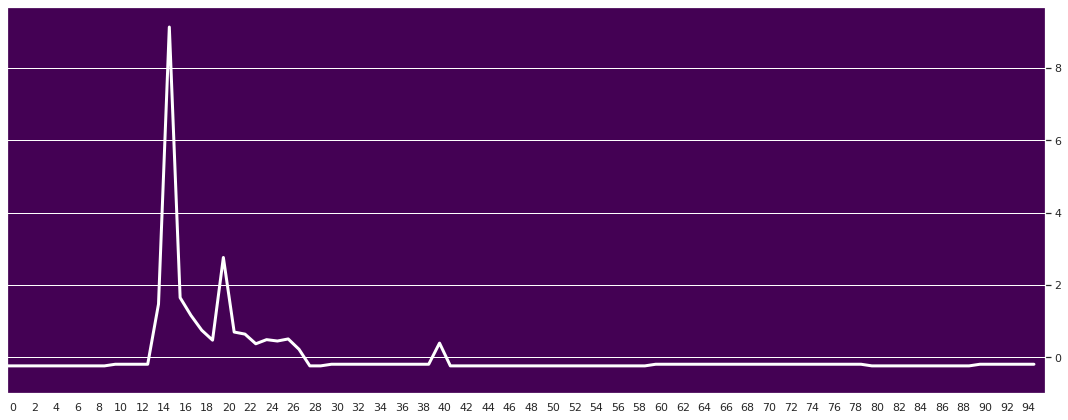

In [9]:

sns.set(rc={'figure.figsize':(15,6)})
#riginal=original_x[0]
l=original.shape[-1]
original=test_x[0]
print(original.shape)
print(np.array(ind1).shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01=np.zeros_like(original.reshape(-1)).reshape(1,-1) #np.abs(np.array(ind1).reshape(-1)-np.array(ind1_x).reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=np.array(ind1_x).flatten(), color='white',linewidth=linewidth)
plt.ylim(mi, ma)
plt.tight_layout()
plt.savefig('./Paper_Images/Ind1.svg', format='svg', transperent = True)
plt.show()
plt.close()


(1, 96)
(1, 96)


/home/jacqueline/.local/share/virtualenvs/TSEvo-ydCVe3on/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  


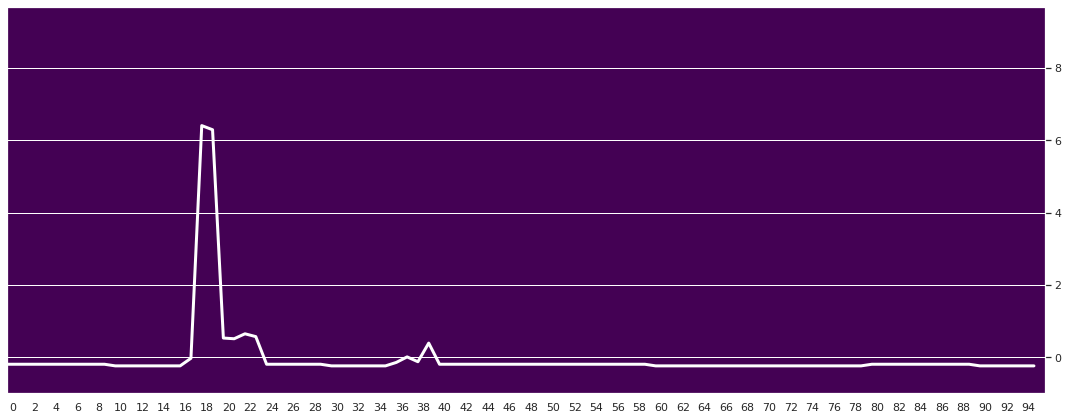

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
#riginal=original_x[0]
l=original.shape[-1]
original=test_x[1]
print(original.shape)
print(np.array(ind1).shape)
ax011 = plt.subplot(111)
ax012 = ax011.twinx()
sal_01= np.zeros_like(original.reshape(-1)).reshape(1,-1)#np.abs(np.array(ind2).reshape(-1)-np.array(ind2_x).reshape(-1)).reshape(1,-1)
sns.heatmap(sal_01, fmt="g", cmap='viridis', cbar=False, ax=ax011, yticklabels=False)
sns.lineplot(x=range(l), y=np.array(ind2_x).flatten(), color='white',linewidth=linewidth)
plt.ylim(mi, ma)
plt.tight_layout()
plt.savefig('./Paper_Images/Ind3.svg', format='svg', transperent=True)
plt.show()
plt.close()